# Questão 1

![Questão 1 - Terceira unidade](questao01_3und.png)


## Método do Gradiente -  Equação de Busca

\begin{equation}
\Large
\begin{bmatrix}
x \\
y
\end{bmatrix}^{(t+1)} =
\begin{bmatrix}
    x\\
    y
\end{bmatrix}^{(t)} + c
\begin{bmatrix}
    \frac{\partial f}{\partial x} \\
    \text{ } \\
    \frac{\partial f}{\partial y}
\end{bmatrix}^{(t)}
\end{equation}


### Bibliotecas

In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import cm # Gráfico 3D

## Explorando a função

### Definimos a função

\begin{equation}
f(x,y)=2.25xy^2-1.5x^2 + 1.75y-2y^2

\end{equation}

In [20]:
def funcao(x,y):
    return 2.25*x*y - 1.5*x**2 + 1.75*y - 2*y**2 

### Espaço geométrico do gráfico

In [21]:
x_v = np.linspace(-5, 5, 500) # Intervalos para x
y_v = np.linspace(-5, 5, 500) # Intervalos para y

x_arr, y_arr = np.meshgrid(x_v, y_v) # Espaço cartesiano

f_arr = [[funcao(x_, y_) for x_ in x_v] for y_ in y_v] # Calculando f(x,y) para os valores de x_v e y_v
f_arr = np.array(f_arr) # Armazena em um array

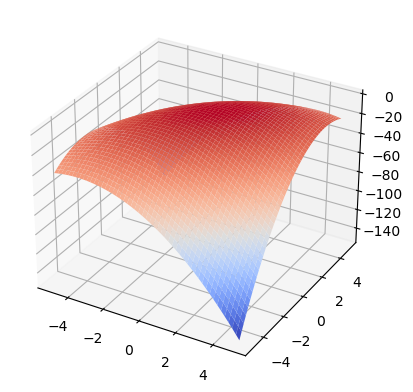

In [22]:
ax = plt.figure().add_subplot(projection='3d')
surf = ax.plot_surface(x_arr, y_arr, f_arr, cmap=cm.coolwarm)

## Definindo o vetor gradiente

\begin{equation}
\Large
\begin{bmatrix}

\frac{\partial f}{\partial x} \\
    \text{ } \\
    \frac{\partial f}{\partial y}

\end{bmatrix} = 

\begin{bmatrix}
2.25y - 3x\\
2.25x +1.75 -4y
\end{bmatrix}
\end{equation}

In [23]:
def gradiente(x,y):
    derivadaParcial_x = 2.25*y - 3*x
    derivadaParcial_y = 2.25*x - 4*y + 1.75

    vetorgradiente = np.array([derivadaParcial_x,derivadaParcial_y])
    
    return vetorgradiente

### Função para cálculo de norma

In [24]:
def calculoNorma(vetor):    
    return np.sqrt(vetor[0]**2 + vetor[1]**2)

## Definindo a equação de busca

In [25]:
def equacaodeBusca(x_inicial, y_inicial, tolerancia, iteracoesMaxima, passo):
    
    x, y = x_inicial, y_inicial
    historico = [(x, y, funcao(x, y))] # Array para armazenar os valores de x,y e o valor de f(x,y) nestes pontos

    for i in range (iteracoesMaxima): # Iteraremos até no MÁXIMO 200x
        gradiente_ = gradiente(x, y) # Armazena o jacobiano na coordenada (x,y)

        x_novo = x - passo * gradiente_[0] # Equação de busca
        y_novo = y - passo * gradiente_[1]

        deltaFuncao = np.array([x_novo - x, y_novo - y]) # Vetor para armazenar as diferenças entre o x_novo/y_novo e o x/y
        
        historico.append((x_novo, y_novo, funcao(x_novo, y_novo)))

        if calculoNorma(deltaFuncao) < tolerancia:
            return np.array(historico), True # Se convergir antes dos 200 loops, encerra e retorna o array 'historico' e o boolean True
        
        x, y = x_novo, y_novo # Passaremos os valores calculados para x e y na equação de busca

    return np.array(historico), False

## Calculando o que a questão pede


\begin{aligned}

&\quad \texttt{x\_inicial} = 2 \\
&\quad \texttt{y\_inicial} = 2 \\
&\quad \texttt{tolerancia} = 5 \times 10^{-5} \\
&\quad \texttt{iteracoesMaxima} = 200 \\
&\quad \texttt{passo} = -0.1,\ -0.2
\end{aligned}




------------------------------
Teste: c = -0.1
c = -0.1
Convergiu? True
Iteracoes: 69
Ponto final: x=0.567825, y=0.756963
f(x,y) = 0.662162

------------------------------
Teste: c = -0.2
c = -0.2
Convergiu? True
Iteracoes: 36
Ponto final: x=0.567672, y=0.756840
f(x,y) = 0.662162


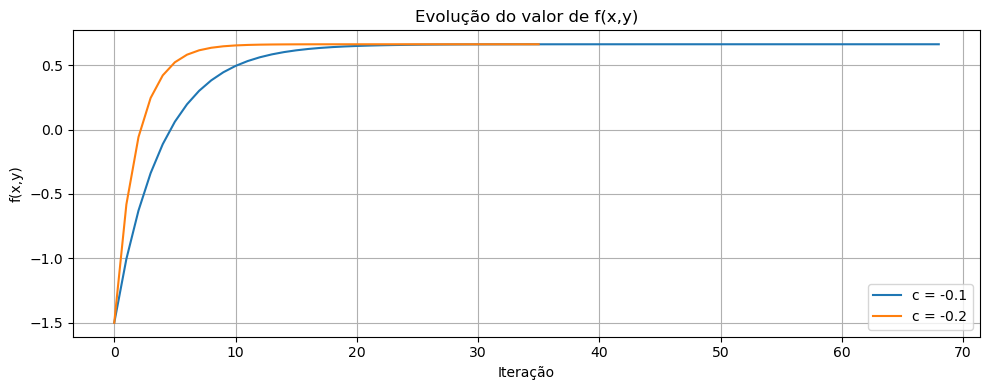

In [26]:
valoresdePasso = {
    "c = -0.1" : -0.1,
    "c = -0.2" : -0.2
} # Dicionário de valores de passo

resultados = {} # Vetor de resultados das iterações

# Calculando elementos
for label, c in valoresdePasso.items():
    vetorHistorico, confirmacaoConvergencia = equacaodeBusca(2, 2, 5e-5, 200, c)
    resultados[label] = (vetorHistorico, confirmacaoConvergencia)
    print("\n------------------------------")
    print(f"Teste: {label}")
    print(f"c = {c}")
    print(f"Convergiu? {confirmacaoConvergencia}")
    print(f"Iteracoes: {len(vetorHistorico)}")
    print(f"Ponto final: x={vetorHistorico[-1,0]:.6f}, y={vetorHistorico[-1,1]:.6f}")
    print(f"f(x,y) = {vetorHistorico[-1,2]:.6f}")

# Plotando o gráfico
plt.figure(figsize=(10,4))
for label, (hist, _) in resultados.items():
    plt.plot(hist[:,2], label=label)

plt.xlabel("Iteração")
plt.ylabel("f(x,y)")
plt.title("Evolução do valor de f(x,y)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
    